In [28]:
import numpy as np
import pandas as pd

In [29]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer

In [30]:
df = pd.read_csv('train.csv')[['Age','Fare','SibSp','Parch','Survived']]

In [31]:
df.dropna(inplace=True)

In [32]:
df.head()

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [33]:
df['family'] = df['SibSp'] + df['Parch']

In [34]:
df.head()

,Age,Fare,SibSp,Parch,Survived,family
0,22.0,7.2500,1,0,0,1
1,38.0,71.2833,1,0,1,1
2,26.0,7.9250,0,0,1,0
3,35.0,53.1000,1,0,1,1
4,35.0,8.0500,0,0,0,0


In [35]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [36]:
df.head()

,Age,Fare,Survived,family
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [37]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
X_train.head()

,Age,Fare,family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


In [40]:
# Without binarization

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6293706293706294

In [41]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6429381846635367

In [20]:
# Applying Binarization

from sklearn.preprocessing import Binarizer

In [42]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [43]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [44]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [45]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6363636363636364

In [46]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.6304186228482003

# Example

In [2]:
import pandas as pd

df = pd.DataFrame({
    'Age': [22, 25, 30, 35, 40, 45, 50],
    'Salary': [25000, 32000, 40000, 50000, 65000, 80000, 100000]
})

print(df)


   Age  Salary
0   22   25000
1   25   32000
2   30   40000
3   35   50000
4   40   65000
5   45   80000
6   50  100000


In [4]:
# using np.where()

import numpy as np

df['Age_Binary'] = np.where(df['Age'] > 30, 1, 0)
df['Salary_Binary'] = np.where(df['Salary'] > 50000, 1, 0)

print(df)


   Age  Salary  Age_Binary  Salary_Binary
0   22   25000           0              0
1   25   32000           0              0
2   30   40000           0              0
3   35   50000           1              0
4   40   65000           1              1
5   45   80000           1              1
6   50  100000           1              1


In [6]:
# Using sklearn.preprocessing.Binarizer

from sklearn.preprocessing import Binarizer
import numpy as np

# Create separate Binarizers for each threshold
binarizer_age = Binarizer(threshold=30)
binarizer_salary = Binarizer(threshold=50000)

# Apply to each column
df['Age_Binary'] = binarizer_age.fit_transform(df[['Age']])
df['Salary_Binary'] = binarizer_salary.fit_transform(df[['Salary']])

print(df)


   Age  Salary  Age_Binary  Salary_Binary
0   22   25000           0              0
1   25   32000           0              0
2   30   40000           0              0
3   35   50000           1              0
4   40   65000           1              1
5   45   80000           1              1
6   50  100000           1              1


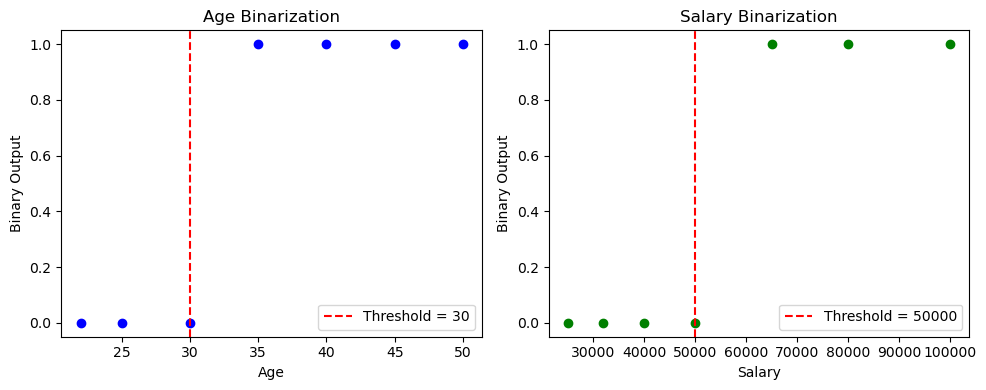

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(df['Age'], df['Age_Binary'], color='blue')
ax[0].axvline(x=30, color='red', linestyle='--', label='Threshold = 30')
ax[0].set_title('Age Binarization')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Binary Output')
ax[0].legend()

ax[1].scatter(df['Salary'], df['Salary_Binary'], color='green')
ax[1].axvline(x=50000, color='red', linestyle='--', label='Threshold = 50000')
ax[1].set_title('Salary Binarization')
ax[1].set_xlabel('Salary')
ax[1].set_ylabel('Binary Output')
ax[1].legend()

plt.tight_layout()
plt.show()
